https://pandas.pydata.org/docs/user_guide/basics.html?highlight=dtype#dtypes

In [ ]:
import pandas as pd

`float` nombre à virgule, ou entiers avec na  
`int` integer sans NA  
`object` tout type d'objets (mixed dtypes entre autre).  

Ils sont souvent suivit d'un nombre qui indique le nombre de bit consacré à stocker de la donnée.

[la documentation numpy](https://numpy.org/doc/stable/user/basics.types.html)

Et plus le type est petit, moins il prend de vive (ou sur disque en fonction du format de stockage).

In [ ]:
s =pd.Series(list(range(10**7)))

In [ ]:
s.memory_usage()

80000128

In [ ]:
s.astype("int32").memory_usage()

40000128

In [ ]:
s.astype("float32").memory_usage()

40000128

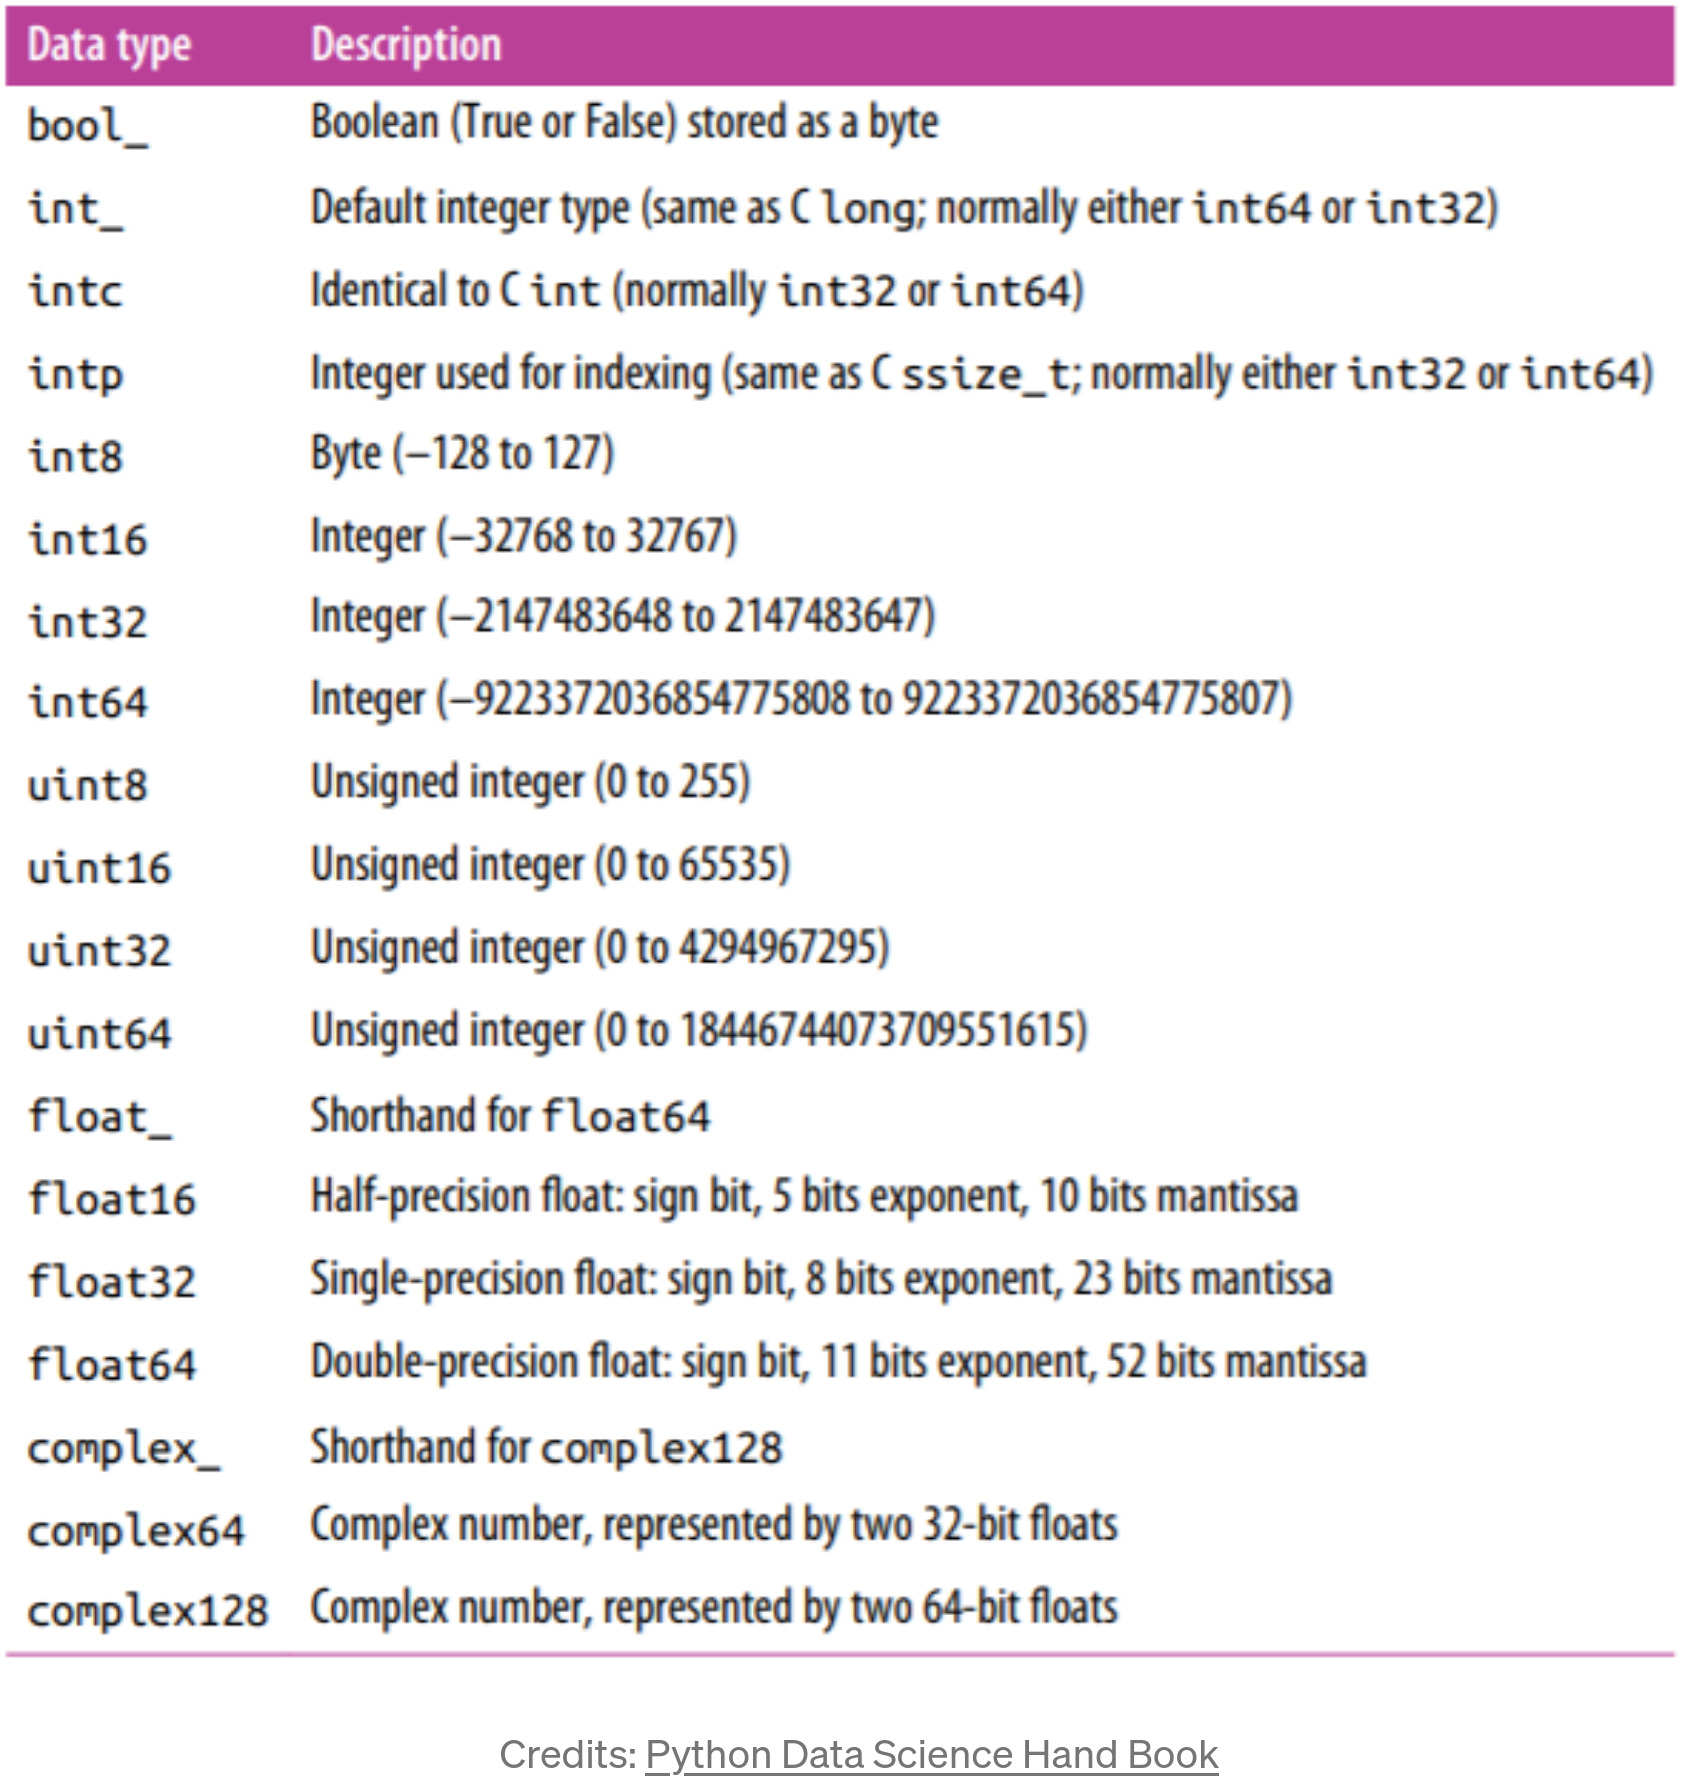

### Exemple lecture csv

In [13]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/adrienpacifico/python_data_science/main/Download/2019_extract.txt",
                 sep="|")

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,16,18,19,20,22,23,24,26,28,30,32,33,34,35,37,38,39,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100006 entries, 0 to 100005
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Code service CH             1 non-null       object
 1   Reference document          1 non-null       object
 2   1 Articles CGI              1 non-null       object
 3   2 Articles CGI              1 non-null       object
 4   3 Articles CGI              1 non-null       object
 5   4 Articles CGI              1 non-null       object
 6   5 Articles CGI              1 non-null       object
 7   No disposition              100006 non-null  object
 8   Date mutation               100006 non-null  object
 9   Nature mutation             100006 non-null  object
 10  Valeur fonciere             99017 non-null   object
 11  No voie                     53875 non-null   object
 12  B/T/Q                       3652 non-null    object
 13  Type de voie                4

In [15]:
df.shape[0]/10**6

0.100006

On voit que la surface du premier lot n'est pas une float

In [16]:
df.iloc[:,25]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
100001      NaN
100002      NaN
100003    44,69
100004      NaN
100005      NaN
Name: Surface Carrez du 1er lot, Length: 100006, dtype: object

##### On peut convertir un dtype sur un dtype différent

In [20]:
df["Valeur fonciere"].str.replace(",",".").head().astype("float")

0    8000.0
1    2175.0
2    2175.0
3    2175.0
4    2175.0
Name: Valeur fonciere, dtype: float64

⚠️ Il n'existe aucun mécanisme pour vérifier que la conversion se passe bien...

In [21]:
s = pd.Series(list(range(10**7)))

In [22]:
s.astype("int8")

0            0
1            1
2            2
3            3
4            4
          ... 
9999995    123
9999996    124
9999997    125
9999998    126
9999999    127
Length: 10000000, dtype: int8